<a href="https://colab.research.google.com/github/GaryPython/Data-science-marathon/blob/main/Titanic/%E4%BD%9C%E6%A5%ADD35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [3]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [ ]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [8]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

df_train.head()
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [20]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
print(df_test.columns)
print(df_train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [21]:
#可以嘗試用範例的程式

print("資料筆數=",df_test.shape)
# 判斷測試資料集，是否有遺失值
# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_test.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_test.isnull().any().sum())


資料筆數= (418, 11)
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [22]:
#合併資料
data = df_train.append(df_test)

print(data.info())

print('cabin 遺失個數=',data['Cabin'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
cabin 遺失個數= 1014


In [13]:
# 以 XXX 為例，先看 Cabin  出現值的特性

print(data["Cabin"].value_counts())


C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F2                 4
                  ..
E77                1
C128               1
C103               1
C39                1
D38                1
Name: Cabin, Length: 186, dtype: int64


In [23]:
print(data['Cabin'].head(10))
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
#data["Cabin"].unique()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


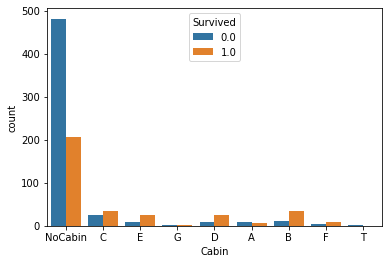

In [17]:
sns.countplot(data['Cabin'], hue=data['Survived'])
#結論，遺失的死亡率比較高

In [29]:
#數值計算
data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# NoCabin的比例和 T 較接近

,Cabin,Survived
97,C62 C64,1.0
124,D21,1.0
121,D17,1.0
122,D19,1.0
77,C148,1.0
...,...,...
166,E52,NaN
168,E60,NaN
174,F,NaN
175,F E46,NaN


In [31]:
data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived')


,Cabin,Survived
0,A10,0.0
58,B86,0.0
59,B94,0.0
66,C110,0.0
67,C111,0.0
...,...,...
166,E52,NaN
168,E60,NaN
174,F,NaN
175,F E46,NaN


In [30]:
data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean()


,Cabin,Survived
0,A10,0.0
1,A11,NaN
2,A14,0.0
3,A16,1.0
4,A18,NaN
...,...,...
181,F33,1.0
182,F38,0.0
183,F4,1.0
184,G6,0.5


In [37]:
data[['Cabin', 'Survived']].groupby(['Cabin']).mean().sort_values(by='Survived')


,Survived
Cabin,
A10,0.0
B86,0.0
B94,0.0
C110,0.0
C111,0.0
...,...
E52,NaN
E60,NaN
F,NaN
